# Class 9 - Starter Code

In [1]:
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn import grid_search
from sklearn import metrics
from sklearn import linear_model
from sklearn import dummy

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1)
%matplotlib inline

## Part 1. Load Dataset

#### 1.1 Let's load the dataset and check the first five rows

In [2]:
# load data
df = pd.read_csv('../../assets/dataset/admissions.csv')

# check head
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Part 2. Pre-Process Data

#### 2.1 Check and remove missing values
**Reading**: Read Pandas docs on handling missing values:
[http://pandas.pydata.org/pandas-docs/stable/missing_data.html](http://pandas.pydata.org/pandas-docs/stable/missing_data.html)

In [3]:
# check for missing values in each column before dropping
print "Missing values:"
print df.isnull().sum()

Missing values:
admit       0
gre         2
gpa         2
prestige    1
dtype: int64


In [4]:
# drop missing values if there are any
if df.isnull().sum().sum():
    print "There are missing values"
    df = df.dropna()
    print "Missing values dropped"

There are missing values
Missing values dropped


In [5]:
# check for missing values in each column after dropping
print "Missing values:"
print df.isnull().sum()

Missing values:
admit       0
gre         0
gpa         0
prestige    0
dtype: int64


#### 2.2 Check and convert all data types to numerical

In [6]:
# check data types
print df.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object


In [14]:
# Get numerical columns
num_cols = set(df.dtypes[((df.dtypes=="int64")|(df.dtypes=="float64"))].index)
non_cols = set(df.columns)-num_cols

print "Numerical columns:"
print num_cols
print "Non-numerical columns:"
print non_cols

# here all columns are numeric; no need to convert

Numerical columns:
set(['prestige_4.0', 'prestige_1.0', 'gpa', 'admit', 'gre', 'prestige_2.0', 'prestige_3.0'])
Non-numerical columns:
set([])


#### 2.3 Check and create dummy variables for categorical features
**Reading**: API Docs for `get_dummies()`:
[http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

In [15]:
# create dummy variables for `prestige` feature
# this check allows this code to be run multiple times
if 'prestige' in df.columns:
    # get dummy variables for prestige
    df = df.join(pd.get_dummies(df['prestige'], prefix='prestige'))
    # remove prestige column
    df.drop(['prestige'], axis=1, inplace=True)

In [16]:
# check for newly added columns
df.head()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0.0,0.0,1.0,0.0
1,1,660.0,3.67,0.0,0.0,1.0,0.0
2,1,800.0,4.00,1.0,0.0,0.0,0.0
3,1,640.0,3.19,0.0,0.0,0.0,1.0
4,0,520.0,2.93,0.0,0.0,0.0,1.0


## Part 3. Cross Validation

#### 3.1 Create separate training and test sets
**Reading**:

Read Scikit docs on cross validation:
[http://scikit-learn.org/stable/modules/cross_validation.html](http://scikit-learn.org/stable/modules/cross_validation.html)

Read Scikit docs on `sklearn.cross_validation.train_test_split()`:
[http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)

In [17]:
# set X and y
X = df.drop(['admit'], axis=1)
y = df['admit']

In [18]:
# create separate training and test set with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.4, random_state=0)

In [19]:
# check size of training set
print X_train.shape, y_train.shape

# check size of test set
print X_test.shape, y_test.shape

(238, 6) (238,)
(159, 6) (159,)


## Part 4. Build Model

#### 4.1 Build Logistic Regression Classifier
**Reading**: Read Scikit docs for `sklearn.linear_model.LogisticRegression`: [http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [21]:
# instantiate lm classifier using default params
lm = linear_model.LogisticRegression()

# train lm classifier on training set
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### 4.2 Evaluate Model
**Reading**: Read Scikit docs on evaluating models: [http://scikit-learn.org/stable/modules/model_evaluation.html](http://scikit-learn.org/stable/modules/model_evaluation.html)

In [22]:
# check model accuracy on test set
accuracy = lm.score(X_test, y_test)
print "Accuracy: " + str(accuracy)

Accuracy: 0.660377358491


**Reading**: Read Scikit docs on confusion matrix: [http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

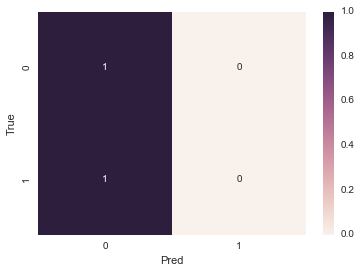

[[105   0]
 [ 54   0]]


In [23]:
# Get confusion matrix on test set
y_pred = lm.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print cm

**Reading**: Read API Docs for [sklearn.metrics.roc_curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

ROC AUC Score: 0.733245149912


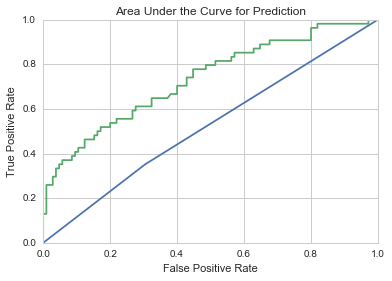

In [35]:
# Plot ROC curve and get AUC score

# train and predict using dummy model
dm = dummy.DummyClassifier()
dm.fit(X_train, y_train)
predict_proba_dm_test = dm.predict_proba(X_test).T[1]

# train and predict using logstic model
lm = linear_model.LogisticRegression()
lm.fit(X_train, y_train)
predict_proba_lm_test = lm.predict_proba(X_test).T[1]

# plot ROC curve
ax = plt.subplot(111)
vals = metrics.roc_curve(y_test, predict_proba_dm_test)
ax.plot(vals[0], vals[1])
vals = metrics.roc_curve(y_test, predict_proba_lm_test)
ax.plot(vals[0], vals[1])

ax.set(title='Area Under the Curve for Prediction', 
       ylabel='True Positive Rate', 
       xlabel='False Positive Rate', 
       xlim=(0, 1), 
       ylim=(0, 1))

# get AUC score
print "ROC AUC Score: " + str(metrics.roc_auc_score(y_test, predict_proba_lm_test))

## Part 5. Tune Model

#### 5.1 Perform Grid Search for `C`
**Reading**: Read Scikit docs for `sklearn.grid_search.GridSearchCV`:
[http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html)

In [38]:
# set list of values to grid search over
c = range(1, 150)
params = {'C': c}

# perform grid search using list of values
gs = grid_search.GridSearchCV(
    estimator=linear_model.LogisticRegression(),
    param_grid=params)
gs.fit(X_train, y_train)

# get best value to use
print gs.best_estimator_

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


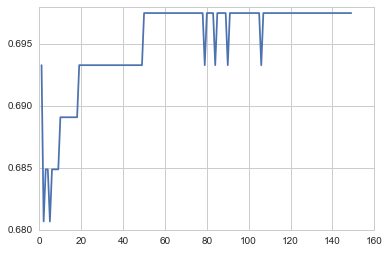

In [39]:
# plot search values vs. grid scores
plt.plot(c, [s[1] for s in gs.grid_scores_])

#### 5.2 Update model using best `C`

In [44]:
# instantiate lm classifier using updated params
lm = linear_model.LogisticRegression(C=50)

# train updated lm classifier on training set
lm.fit(X_train, y_train)

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### 5.3 Evaluate updated model

In [45]:
# check updated model accuracy on test set
accuracy = lm.score(X_test, y_test)
print "Accuracy: " + str(accuracy)

Accuracy: 0.691823899371


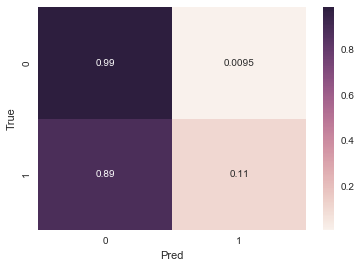

[[104   1]
 [ 48   6]]


In [46]:
# Get confusion matrix on test set
y_pred = lm.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print cm

ROC AUC Score for lm1: 0.733245149912
ROC AUC Score for lm2: 0.736772486772


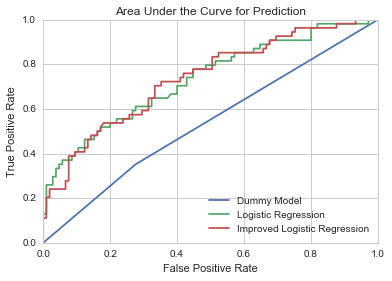

In [49]:
# Plot ROC curve and get AUC score of updated model

# train and predict using dummy model
dm = dummy.DummyClassifier()
dm.fit(X_train, y_train)
predict_proba_dm_test = dm.predict_proba(X_test).T[1]

# train and predict using logstic model
lm1 = linear_model.LogisticRegression()
lm1.fit(X_train, y_train)
predict_proba_lm1_test = lm1.predict_proba(X_test).T[1]

# train and predict using improved logstic model
lm2 = lm
lm2.fit(X_train, y_train)
predict_proba_lm2_test = lm.predict_proba(X_test).T[1]

# plot ROC curve
ax = plt.subplot(111)
vals = metrics.roc_curve(y_test, predict_proba_dm_test)
ax.plot(vals[0], vals[1], label='Dummy Model')
vals = metrics.roc_curve(y_test, predict_proba_lm1_test)
ax.plot(vals[0], vals[1], label='Logistic Regression')
vals = metrics.roc_curve(y_test, predict_proba_lm2_test)
ax.plot(vals[0], vals[1], label='Improved Logistic Regression')

ax.set(title='Area Under the Curve for Prediction', 
       ylabel='True Positive Rate', 
       xlabel='False Positive Rate', 
       xlim=(0, 1), 
       ylim=(0, 1))
plt.legend(loc='lower right')

# get AUC score
print "ROC AUC Score for lm1: " + str(metrics.roc_auc_score(y_test, predict_proba_lm1_test))
print "ROC AUC Score for lm2: " + str(metrics.roc_auc_score(y_test, predict_proba_lm2_test))